# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/DC_vs_marvel.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[DC](https://en.wikipedia.org/wiki/Lists_of_DC_Comics_characters)** and **[Marvel](https://en.wikipedia.org/wiki/Lists_of_Marvel_Comics_characters)** characters. 

To create the network, we will download the Wikipedia pages for all characters in each of the DC and Marvel universes. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [Spider-Man](https://en.wikipedia.org/wiki/Spider-Man) links to [Superman](https://en.wikipedia.org/wiki/Superman), for example (it really does), but most links are "within-universe" (so DC characters link to DC character and Marvel characters link to other).

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
<!---* Learn about Pandas dataframes--->
* Download and store (for later use) all the character-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the characters on Wikipedia
* Generate the network of characters on wikipedia. 
* Calculate some simple network statistics.

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment 2022**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [129]:
import urllib3
import re

In [130]:
# 4-digits 
http = urllib3.PoolManager()
r = http.request('GET', 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt')
print(str(r.data))

b"Tousled try-hard blog Carles, typewriter fap hella salvia fanny pack selvage mlkshk crucifix. Next level retro quinoa post-ironic. Heirloom keffiyeh synth street art meggings, drinking vinegar Schlitz actually raw denim. 1234 Normcore freegan post-ironic meggings cred, cardigan yr locavore 3 wolf moon. Bitters ennui ugh superpolaroid, artisan scenester distillery kale chips wolf pork belly keffiyeh. Actually Tumblr twee [[drinking vinegar]], squid pickled cronut banh mi taxidermy deep v 8-bit narwhal Odd Future. Sriracha bicycle rights listicle, keffiyeh typewriter authentic selvage cred selfies.\n\nUgh lo-fi tattooed chambray, DIY Marfa banh mi whatever narwhal jean shorts photo booth keytar listicle. Chambray Truffaut cardigan skateboard, hashtag disrupt next level. Normcore Blue Bottle yr, Odd Future skateboard chillwave iPhone slow-carb sriracha letterpress meditation cronut. IPhone fashion axe Neutra fingerstache tofu gluten-free [[gentrify]], wolf before they sold out pork bell

In [131]:
numbers_four = re.findall(r'\d\d\d\d', str(r.data))
print(numbers_four)

['1234', '9999', '2345']


In [132]:
super_words = re.findall(r'super+', str(r.data))
print(super_words)

['super', 'super', 'super']


In [133]:
http = urllib3.PoolManager()
g = http.request('GET', 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt')
print(str(g.data))

b"Tousled try-hard blog Carles, typewriter fap hella salvia fanny pack selvage mlkshk crucifix. Next level retro quinoa post-ironic. Heirloom keffiyeh synth street art meggings, drinking vinegar Schlitz actually raw denim. 1234 Normcore freegan post-ironic meggings cred, cardigan yr locavore 3 wolf moon. Bitters ennui ugh superpolaroid, artisan scenester distillery kale chips wolf pork belly keffiyeh. Actually Tumblr twee [[drinking vinegar]], squid pickled cronut banh mi taxidermy deep v 8-bit narwhal Odd Future. Sriracha bicycle rights listicle, keffiyeh typewriter authentic selvage cred selfies.\n\nUgh lo-fi tattooed chambray, DIY Marfa banh mi whatever narwhal jean shorts photo booth keytar listicle. Chambray Truffaut cardigan skateboard, hashtag disrupt next level. Normcore Blue Bottle yr, Odd Future skateboard chillwave iPhone slow-carb sriracha letterpress meditation cronut. IPhone fashion axe Neutra fingerstache tofu gluten-free [[gentrify]], wolf before they sold out pork bell

In [134]:
find_brack = re.findall(r'\[\[(.*?)\]\]', str(g.data))
print(find_brack)

['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle|Bicycle(two-wheeled type)', 'Pitchfork|Pitchfork Magazine']


---

# Part A: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

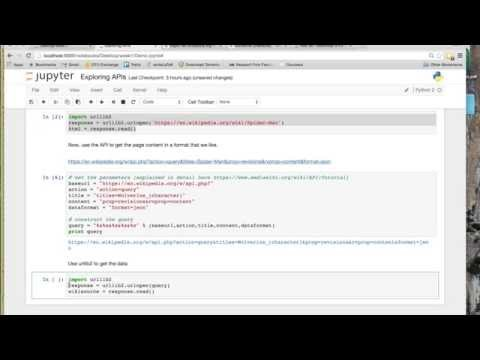

In [135]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, back in the day, I had all students first download the names of all the characters, starting from 

* https://en.wikipedia.org/wiki/Lists_of_Marvel_Comics_characters
* https://en.wikipedia.org/wiki/Lists_of_DC_Comics_characters

But that resulted in so much pain and suffering that recently I've decided against that. Instead, you can download all the names, nice and clean, here (it might still include couple of noisy links, but should be fine in the vast majority of records):

These are available as CSV below (working with the CSV is recommended)
* [Marvel List](https://github.com/SocialComplexityLab/socialgraphs2022/blob/master/files/marvel.csv)
* [DC List](https://github.com/SocialComplexityLab/socialgraphs2022/blob/master/files/dc.csv)


If you like to work in `pandas`, you can get table-versions here
* [Marvel List](https://github.com/SocialComplexityLab/socialgraphs2022/blob/master/files/marvel.pkl) as a pandas table. 
* [DC List](https://github.com/SocialComplexityLab/socialgraphs2022/blob/master/files/dc.pkl) as a pandas table.
* These files are also available in pandas 1.3.5 since there are some version issues ([DC](https://github.com/SocialComplexityLab/socialgraphs2022/blob/master/files/dc-pandas_1_3_5.pkl), [Marvel](https://github.com/SocialComplexityLab/socialgraphs2022/blob/master/files/marvel-pandas_1_3_5.pkl)). 

(Thanks to TA Silvia for updating these lists, and to TA Nojus for catching various mistakes. Note that Silvia has used the [`pickle`](https://docs.python.org/3/library/pickle.html#data-stream-format) format to store the data, so you'll have to read about that to access the list. **If you just want to get started, read [this link](https://wiki.python.org/moin/UsingPickle)**. Pickling your data has some advantages over just writing it to a `.csv` file. Pickles are less portable (they only work in python), but they let you easily read data directly into a dictionary + I think they also contain some compression.)

#### A challenge
If you're feeling tough, you can head over to our [Hardcore List Parsing](https://github.com/SocialComplexityLab/socialgraphs2022/blob/master/files/Hardcore_List_Parsing.ipynb) notebook, full of tricks to help you try out creating these lists on your own! If you manage to do both Marvel and DC on our own, you will officially have graduated to brown-belt Python hacker. (Black belt challenges coming later in the year.)

#### Some notes to the perfectionists out there
The files contain names and corresponding wiki-link. 
  - If link if absent, one possiblity is that character does not have a specific page and information about this particular character can be found directly in the [Marvel](https://en.wikipedia.org/wiki/Lists_of_Marvel_Comics_characters) or [DC](https://en.wikipedia.org/wiki/Lists_of_DC_Comics_characters) lists* (BUT you do not have to grab that text - if you do not feel comfortable with extracting paragraphs from lists it is okay to ignore Comic characters with absent links) .
  - Similarly, pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects)** .



With these two lists, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of Marvel and DC characters. 
>  - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your download the cleanest possible version of the page (the wikitext). [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>  - Hint 1: You may want to save the pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per character, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>  - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.

In [136]:
import pandas as pd

df_dc = pd.read_csv('dc.csv', index_col=0)
df_marvel = pd.read_csv('marvel.csv',index_col=0)
df_dc

,CharacterName,WikiLink
0,Abin Sur,Abin Sur
1,Abra Kadabra (character),Abra Kadabra (character)
2,Abby Holland,Abby Holland
3,Ace the Bat-Hound,Ace the Bat-Hound
4,Acrata,NaN
...,...,...
766,4-D,International Ultramarine Corps#Founding membe...
767,500Z-Q,Hero Hotline#Support crew
768,666,NaN
769,#711,711 (Quality Comics)


In [137]:
df_marvel

,CharacterName,WikiLink
0,Abomination,Abomination (character)
1,Absorbing Man,Absorbing Man
2,Abraxas,NaN
3,Abyss,NaN
4,Access,NaN
...,...,...
2368,Zuras,list of Eternals
2369,Zuri,NaN
2370,Zzzax,Zzzax
2371,3-D Man,3-D Man


In [138]:
http = urllib3.PoolManager()
H = http.request('GET', 'https://en.wikipedia.org/wiki/3-D_Man')

In [139]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=3-D_Man"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
print(query)

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=3-D_Man&format=json


In [140]:
http = urllib3.PoolManager()
wikiresource = http.request('GET', query)

In [141]:
import json
wikijson = json.loads(wikiresource.data.decode('utf-8'))
#print(wikijson)

In [142]:
print(df_marvel.iloc[0, 1])

Abomination (character)


In [143]:
query = []
separator = '#'

for i in range(len(df_marvel)):
    
    # if re.search(r'\(\w+\)', str(df_marvel.iloc[i, 1])):  # The old one with name problem.
    if type(df_marvel.iloc[i, 1]) == str:
        if re.search(r'#', str(df_marvel.iloc[i, 1])):
            without = df_marvel.iloc[i, 1].partition(separator)[0]
            df_marvel.iloc[i, 1] = without
            
        df_marvel.iloc[i, 1] = df_marvel.iloc[i, 1].replace(" ", "_")    
        title = "titles=" + df_marvel.iloc[i, 1]
        query.append("%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat))
    else:
        df_marvel.iloc[i, 0] = df_marvel.iloc[i, 0].replace(" ", "_")
        title = "titles=" + df_marvel.iloc[i, 0]
        query.append("%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat))
query

['https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abomination_(character)&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Absorbing_Man&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abraxas&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abyss&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Access&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Achebe_(comics)&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Adam&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Adam_X&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Aegis&format=json'

In [144]:
http = urllib3.PoolManager()

for i in range(len(query)):
    wikiresource = http.request('GET', query[i])
    wikijson = json.loads(wikiresource.data.decode('utf-8'))
    
    if re.search(r'/', str(df_marvel.iloc[i, 0])):
        df_marvel.iloc[i, 0] = df_marvel.iloc[i, 0].replace("/", "\\")
    if re.search(r'/', str(df_marvel.iloc[i, 1])):
        df_marvel.iloc[i, 1] = df_marvel.iloc[i, 1].replace("/", "\\")
    
    #if re.search(r'(comics)', str(df_marvel.iloc[i, 1])):  #The old one with name problem.
    if type(df_marvel.iloc[i, 1]) == str:
        with open('/Users/luchengliang/Social_Graph_and_Networks/Marvel/' + df_marvel.iloc[i, 1] + '.txt', 'w') as f:
            f.write(str(wikijson))
    else:
        with open('/Users/luchengliang/Social_Graph_and_Networks/Marvel/' + df_marvel.iloc[i, 0] + '.txt', 'w') as f:
            f.write(str(wikijson))

In [145]:
#DC part
query = []
separator = '#'

for i in range(len(df_dc)):
    #if re.search(r'\(\w+\)', str(df_dc.iloc[i, 1])):  # The old one with name problem.
    if type(df_dc.iloc[i, 1]) == str:
        if re.search(r'#', str(df_dc.iloc[i, 1])):
            without = df_dc.iloc[i, 1].partition(separator)[0]
            df_dc.iloc[i, 1] = without
            
        df_dc.iloc[i, 1] = df_dc.iloc[i, 1].replace(" ", "_")
        title = "titles=" + df_dc.iloc[i, 1]
        query.append("%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat))
    else:
        df_dc.iloc[i, 0] = df_dc.iloc[i, 0].replace(" ", "_")
        title = "titles=" + df_dc.iloc[i, 0]
        query.append("%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat))
query

['https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abin_Sur&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abra_Kadabra_(character)&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abby_Holland&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ace_the_Bat-Hound&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Acrata&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Acid_Master&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Adam_Strange&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Aerie&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ag

In [146]:
http = urllib3.PoolManager()

for i in range(len(query)):
    try:
        wikiresource = http.request('GET', query[i])
        wikijson = json.loads(wikiresource.data.decode('utf-8'))
        
        if re.search(r'/', str(df_dc.iloc[i, 0])):
            df_dc.iloc[i, 0] = df_dc.iloc[i, 0].replace("/", "\\")
        if re.search(r'/', str(df_dc.iloc[i, 1])):
            df_dc.iloc[i, 1] = df_dc.iloc[i, 1].replace("/", "\\")
        
        #if re.search(r'\(\w+\)', str(df_dc.iloc[i, 1])):  #相對marvel做了小更動  # The old one has some problem.
        if type(df_dc.iloc[i, 1]) == str:
            with open('/Users/luchengliang/Social_Graph_and_Networks/DC/' + df_dc.iloc[i, 1] + '.txt', 'w') as f:
                f.write(str(wikijson))
        else:
            with open('/Users/luchengliang/Social_Graph_and_Networks/DC/' + df_dc.iloc[i, 0] + '.txt', 'w') as f:
                f.write(str(wikijson))

    except Exception:
        if re.search(r'#', str(df_dc.iloc[i, 1])):
            without = df_dc.iloc[i, 1].partition(separator)[0]
            df_dc.iloc[i, 1] = without
            
        df_dc.iloc[i, 1] = df_dc.iloc[i, 1].replace(" ", "_")
        title = "titles=" + df_dc.iloc[i, 1]
        query[i] = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
        
        wikiresource = http.request('GET', query[i])
        wikijson = json.loads(wikiresource.data.decode('utf-8'))
        if re.search(r'/', str(df_dc.iloc[i, 1])):
            df_dc.iloc[i, 1] = df_dc.iloc[i, 1].replace("/", "\\")
            
        with open('/Users/luchengliang/Social_Graph_and_Networks/DC/' + df_dc.iloc[i, 1] + '.txt', 'w') as f:
            f.write(str(wikijson))
        

In [147]:
#Marvel
import os
  
path = "/Users/luchengliang/Social_Graph_and_Networks/Marvel"

dir_list = os.listdir(path)
    
print("Files and directories in \" Marvel \" :") 
# print the list
print(dir_list)

Files and directories in " Marvel " :
['Henry_Pym.txt', 'Puppet_Master_(Marvel_Comics).txt', 'Candra_(comics).txt', 'Erik_Josten.txt', 'Blitz.txt', 'Master_Man_(Marvel_Comics)|l1=Master_Man.txt', 'Hobgoblin_(comics).txt', 'Juggernaut_(comics).txt', 'Digger_(Marvel_Comics).txt', 'Masked_Raider.txt', 'Aldrich_Killian.txt', 'Lamprey_(comics).txt', 'Helix_(Marvel_Comics).txt', 'Black_Box_(comics).txt', 'Scorn.txt', 'Gideon_(comics).txt', 'Dexter_Bennett.txt', 'Paladin_(comics).txt', 'Lord_Dark_Wind.txt', 'Spyne.txt', 'All-American.txt', 'Christine_Everhart.txt', 'Chtylok.txt', 'Shadow_King.txt', 'Uatu.txt', 'Saul_(comics).txt', 'Big_Bertha_(comics).txt', 'Osiris_(Marvel_Comics).txt', 'Vibro.txt', 'Arsenal_(Marvel_Comics).txt', 'Hellrazor.txt', 'Fixer_(comics).txt', 'Viv_Vision.txt', 'Jolt.txt', 'Maximillian_Zaran.txt', 'Hunter.txt', 'Orchid_(comics).txt', 'Siryn.txt', 'Namora.txt', 'Sebastian_Shaw_(comics).txt', 'Sigyn_(Marvel_Comics).txt', 'Spot_(comics).txt', 'Aegis.txt', 'Robert_Maveric

In [148]:
#DC
import os
  
path = "/Users/luchengliang/Social_Graph_and_Networks/DC"

dir_list = os.listdir(path)
    
print("Files and directories in \" DC \" :") 
# print the list
print(type(dir_list[0]))

Files and directories in " DC " :
<class 'str'>


---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both DC and Marvel Characters. 

The nodes in the network will be all the characters, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall strategy for this is the following: Take the pages you have downloaded for each character. 
Each page corresponds to a character (often a super hero), which is a node in your network. 
Find all the hyperlinks in a characters page that link to another node of the network (e.g. an other character). 
There are many ways to do this, but below, I've tried to break it down into natural steps. 
Keep in mind that the network should include **both** DC and Marvel characters (and while the universes are mostly separate by design, it is possible that some DC Characters will have links to Marvel Characters and vice-versa).
 
**Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either DC, or Marvel)
 


> 
> _Exercise_: Build the network of Comics Characters 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over characters/pages to take your little operation to industrial scale
>   - You don't have to be perfect. The will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
>   - If you can get Hint 3 above to work, that is also OK.
> * For each link you extract, check if the target is a character from your DC/Marvel lists. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network. As noted above, remember to store the properties of the nodes (i.e. from which universe they hail).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. Unless you've made a mistake those are truly minor chracters. Double check for mistakes, then *discard* those disconnected nodes from the network.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.


In [149]:
import readline
import networkx as nx

<h3>Single Node Network<h3>

In [150]:
#Abby_Holland's neighbors(Single point)
with open('./Marvel/3-D_Man.txt') as f:
    Abby_Holland = f.readlines()
    connections = re.findall(r'\[\[(.*?)\]\]', str(Abby_Holland))
    for i in range(len(connections)):
        connections[i] = connections[i].partition('|')[0]
        connections[i] = connections[i].replace(" ", "_")
    print(set(connections))


path_dc = "/Users/luchengliang/Social_Graph_and_Networks/DC"
path_marvel = "/Users/luchengliang/Social_Graph_and_Networks/Marvel"

dir_list_dc = os.listdir(path_dc)
dir_list_marvel = os.listdir(path_marvel)

neighbors = []
#print(connections)
for j in range(len(connections)):
    for p in range(len(dir_list_dc)):
        dir_list_dc[p] = dir_list_dc[p].replace(".txt", "")
        neighbors += re.findall(dir_list_dc[p], connections[j])
        
    for u in range(len(dir_list_marvel)):
        dir_list_marvel[u] = dir_list_marvel[u].replace(".txt", "")
        neighbors += re.findall(dir_list_marvel[u], connections[j])

#print(neighbors)

{'Donald_F._Glut', 'The_Avengers_(comic_book)', 'Agents_of_Atlas', 'Category:Fictional_characters_from_Los_Angeles', 'Crimebuster_(Boy_Comics)', 'John_Verpoorten', 'Sal_Buscema', 'Camp_Hammond_(comics)', 'Category:Marvel_Comics_characters_with_superhuman_strength', 'Patrick_Zircher', 'Christos_Gage', 'Avengers_(comics)', 'Richard_Starkings', 'Marvel_Super_Hero_Contest_of_Champions', 'Carl_Gafford', 'Skrull', 'Yellow_Claw_(comics)', 'Grandmaster_(Marvel_Comics)', 'TwoMorrows_Publishing', 'Category:Marvel_Comics_male_superheroes', 'Stefano_Caselli', 'Roy_Thomas', 'Dan_Slott', 'Avengers_Forever', 'Kieron_Dwyer', 'Marvel_Boy_(Robert_Grayson)', 'Roger_Stern', 'Jesus_Merino', 'Special:ApiFeatureUsage', 'Scott_Koblish', 'Fifty_State_Initiative', 'Atlas_Comics_(1950s)', 'Triune_Understanding', 'superhero', 'Delroy_Garrett', 'American_comic_book', 'Tom_Brevoort', 'Back_Issue!', 'Kang_Dynasty', 'Al_Milgrom', 'Alan_Kupperberg', 'George_Roussos', 'Broken_Frontier', 'Secret_Invasion', 'Analogue_(li

[('Abby_Holland', 5), ('', 1), ('Star', 1), ('Jimmy_Woo', 1), ('Gorilla-Man', 1), ('Atlas', 1)]


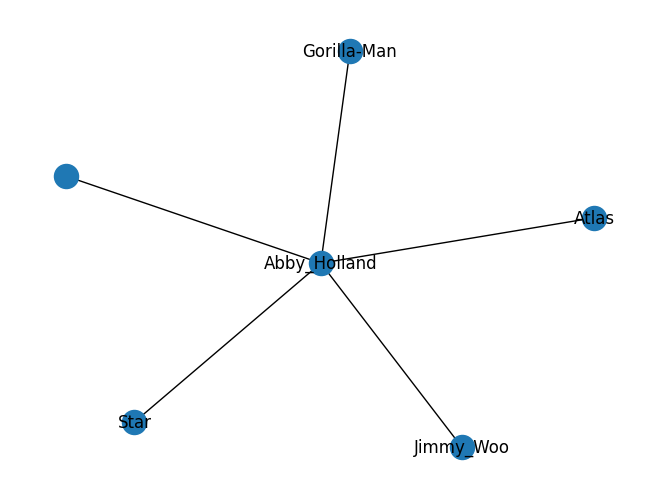

In [151]:
G = nx.Graph()
G.add_node('Abby_Holland')
G.add_edges_from([('Abby_Holland',neighbor) for neighbor in neighbors])
print(G.degree)

nx.draw(G, with_labels=True)

<h3>The whole networks<h3>

In [152]:
import readline
import networkx as nx
import os
import re
import matplotlib.pyplot as plt
import numpy as np


In [156]:
path_dc = "/Users/luchengliang/Social_Graph_and_Networks/DC"
path_marvel = "/Users/luchengliang/Social_Graph_and_Networks/Marvel"

dir_list_dc = []
dir_list_marvel = []

for file in os.listdir(path_dc):
    if file.endswith(".txt"):
        dir_list_dc.append(file)

for file in os.listdir(path_marvel):
    if file.endswith(".txt"):
        dir_list_marvel.append(file)

combine_dir = dir_list_dc + dir_list_marvel

print(combine_dir[0])
print(type(combine_dir[0]))
print(len(dir_list_dc))
print(len(dir_list_marvel))
print(len(dir_list_marvel)+len(dir_list_dc))
print(len(combine_dir))


Garguax.txt
<class 'str'>
760
2357
3117
3117


In [157]:
G = nx.DiGraph()

def FindyourConnection(x):
    connections = re.findall(r'\[\[(.*?)\]\]', str(x))
    for p in range(len(connections)):
        connections[p] = connections[p].partition('|')[0]
        connections[p] = connections[p].replace(" ", "_")
    return connections


dir_list_dc = [x.replace(".txt", "") for x in dir_list_dc]
dir_list_marvel = [y.replace(".txt", "") for y in dir_list_marvel]

for i in range(len(combine_dir)):
    
    if i < len(dir_list_dc):
    #one character's neighbors(Single point)
        with open('./DC/'+ combine_dir[i]) as f:
            content_in_file = f.readlines()
            connections = FindyourConnection(content_in_file)
            universe = "DC" 
    else:
        with open('./Marvel/'+ combine_dir[i]) as f:
            content_in_file = f.readlines()
            connections = FindyourConnection(content_in_file)
            universe = "Marvel"
        
    connections = list(set(connections))
    
    neighbors = []
    #print(connections)
    for j in range(len(connections)):
        if connections[j] in dir_list_dc:
            neighbors.append([connections[j], "DC"])
            
        if connections[j] in dir_list_marvel:
            neighbors.append([connections[j], "Marvel"])

    original_node = combine_dir[i].replace(".txt", "")
    
    if original_node not in list(G.nodes):
        G.add_node(original_node, universe = universe)
    
    for neighbor, universe_n in neighbors:
        if neighbor in list(G.nodes):
            G.add_edge(original_node, neighbor)
        else:
            G.add_node(neighbor, universe = universe_n)
            G.add_edge(original_node, neighbor)
    
   

In [158]:
print(G)

DiGraph with 3112 nodes and 25413 edges


<h4>Discard the node with no connections with others<h4> 

In [159]:
G.remove_nodes_from(list(nx.isolates(G)))        
print(G)

DiGraph with 2375 nodes and 25413 edges



> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * What is the number of links connecting Marvel and DC? What do those links mean?
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected Marvel characters (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected.
> * Who are the top 5 most connected DC characters (again in terms of both in/out-degree)?Comment on your findings. Is this what you would have expected.
> * Who are top 5 most connected characters overall? (again in terms of both in/out-degree). Comment on your findings. Is this what you would have expected.

* What is the number of nodes in the network? 
* More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)

In [160]:
print(G)

DiGraph with 2375 nodes and 25413 edges


* What is the number of links connecting Marvel and DC? What do those links mean?

In [161]:
count = 0
uni =nx.get_node_attributes(G,'universe')

for node in G:
    neighs = list(G[node])
    for neigh in neighs:
        if uni[neigh] != uni[node]:
            count += 1

print("the number of links connecting Marvel and DC: ", count)

the number of links connecting Marvel and DC:  312


* Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
    * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
    * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.

<h4>In_degree Distribution<h4>

In [162]:
in_degree_sequence = sorted((d for n, d in G.in_degree()), reverse=False)
in_degree_count = dict((x,in_degree_sequence.count(x)) for x in set(in_degree_sequence))

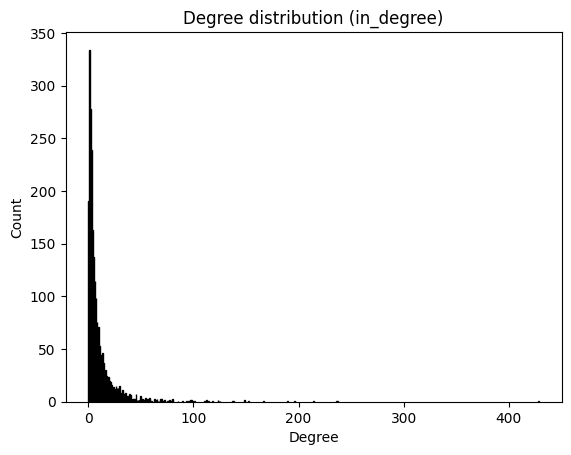

In [163]:
fig, ax = plt.subplots()
ax.bar(x=list(in_degree_count.keys()), height=list(in_degree_count.values()), width=0.8, align='edge', ec='black')
#ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)
plt.xticks(fontsize=10)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution (in_degree)')

plt.show()

**Compare the in-degree distribution to a *scale-free* network with the same number of nodes.**

In [164]:
print(len(in_degree_sequence))
print(np.average(in_degree_sequence))
print(int(np.average(in_degree_sequence)))

2375
10.70021052631579
10


In [165]:
BA = nx.barabasi_albert_graph(n = len(in_degree_sequence), m = int(np.average(in_degree_sequence)), seed=10374196, initial_graph = None)

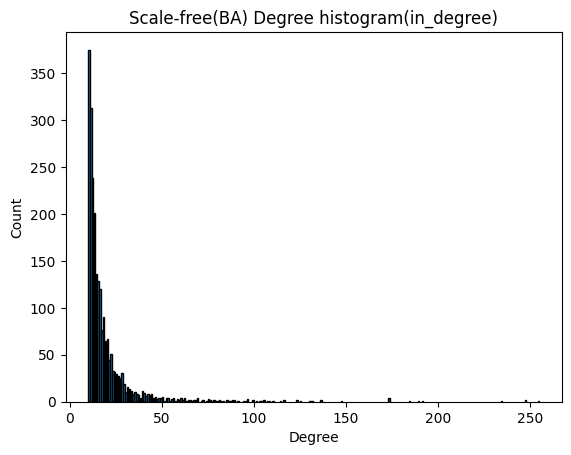

In [166]:
degree_sequence = sorted((d for n, d in BA.degree()), reverse=True)
plt.bar(*np.unique(degree_sequence, return_counts=True), width=0.8, align='edge', ec='black')
plt.title("Scale-free(BA) Degree histogram(in_degree)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

<h4>Out_degree Distribution<h4>

In [167]:
out_degree_sequence = sorted((d for n, d in G.out_degree()), reverse=False)
out_degree_count = dict((x,out_degree_sequence.count(x)) for x in set(out_degree_sequence))

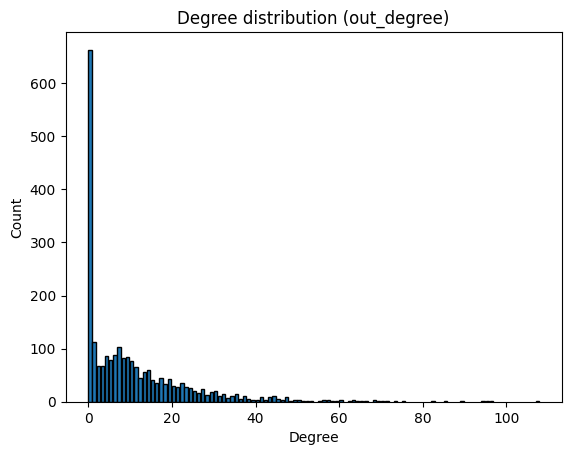

In [168]:
fig, ax = plt.subplots()
ax.bar(x=list(out_degree_count.keys()), height=list(out_degree_count.values()), width=0.8, align='edge', ec='black')
#ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)
plt.xticks(fontsize=10)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution (out_degree)')

plt.show()

**Compare the out-degree distribution to a *random network* with the same number of nodes and links.**

In [169]:
print(len(out_degree_sequence))
print(np.average(out_degree_sequence))
print(max(out_degree_count.values()), min(out_degree_count.values()))

2375
10.70021052631579
663 1


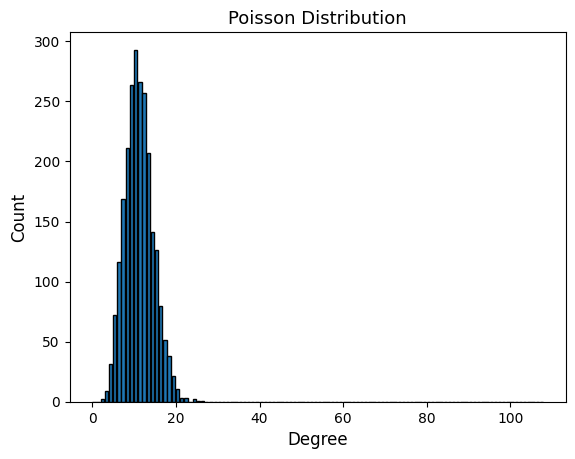

In [170]:
x = np.random.poisson(np.average(out_degree_sequence), len(out_degree_sequence))
v = np.arange(min(out_degree_count),max(out_degree_count)+2)
count,bins=np.histogram(x, bins=v)

#Plot of the Poisson distribution using matplotlib.pyplot.bar function
plt.bar(bins[:-1], count, align='edge', ec='black')
plt.title('Poisson Distribution',fontsize=13)
plt.xlabel('Degree',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show() 

<h4>Top 5 most connected Marvel characters<h4>

**in_degree**

In [171]:
selected_nodes = [n for n,att in G.nodes(data=True) if att['universe'] == 'Marvel']
M = G.subgraph(selected_nodes).copy()
Mcharac_in = sorted(M.in_degree, key=lambda x: x[1], reverse=True)
print(Mcharac_in[0:5])

[('Spider-Man', 418), ('Thor_(Marvel_Comics)', 207), ('Doctor_Doom', 194), ('Doctor_Strange', 187), ('Daredevil_(Marvel_Comics_character)', 162)]


**out_degree**

In [172]:
Mcharac_out = sorted(M.out_degree, key=lambda x: x[1], reverse=True)
print(Mcharac_out[0:5])

[('Wolverine_(character)|Wolverine_(Ultimate_Marvel_character)|Logan_(film_series_character)', 105), ('Betsy_Braddock', 94), ('Iron_Man|Iron_Man_(Ultimate_Marvel_character)|Tony_Stark_(Marvel_Cinematic_Universe)', 91), ('Captain_America|Captain_America_(Ultimate_Marvel_character)|Steve_Rogers_(Marvel_Cinematic_Universe)', 90), ('Hellfire_Club_(comics)', 89)]


<h4>Top 5 most connected DC characters<h4>

**in_degree**

In [173]:
selected_nodes = [n for n,att in G.nodes(data=True) if att['universe'] == 'DC']
D = G.subgraph(selected_nodes).copy()
Dcharac_in = sorted(D.in_degree, key=lambda x: x[1], reverse=True)
print(Dcharac_in[0:5])

[('Batman', 218), ('Superman', 217), ('Wonder_Woman', 135), ('Lex_Luthor', 131), ('Darkseid', 94)]


**out_degree**

In [174]:
selected_nodes = [n for n,att in G.nodes(data=True) if att['universe'] == 'DC']
D = G.subgraph(selected_nodes).copy()
Dcharac_out = sorted(D.out_degree, key=lambda x: x[1], reverse=True)
print(Dcharac_out[0:5])

[('Deathstroke', 53), ('Super_Friends', 46), ('Cyborg_(DC_Comics)', 45), ('Black_Adam', 43), ('Red_Tornado|Red_Tornado_(identity)', 42)]


<h4>Top 5 most connected characters<h4>

**in_degree**

In [175]:
all_in = sorted(G.in_degree, key=lambda x: x[1], reverse=True)
print(all_in[0:5])

[('Spider-Man', 428), ('Batman', 237), ('Superman', 236), ('Thor_(Marvel_Comics)', 214), ('Doctor_Doom', 196)]


**out_degree**

In [176]:
all_out = sorted(G.out_degree, key=lambda x: x[1], reverse=True)
print(all_out[0:5])

[('Wolverine_(character)|Wolverine_(Ultimate_Marvel_character)|Logan_(film_series_character)', 107), ('Iron_Man|Iron_Man_(Ultimate_Marvel_character)|Tony_Stark_(Marvel_Cinematic_Universe)', 96), ('Captain_America|Captain_America_(Ultimate_Marvel_character)|Steve_Rogers_(Marvel_Cinematic_Universe)', 95), ('Betsy_Braddock', 94), ('Hellfire_Club_(comics)', 89)]
